In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rn
from pathlib import Path
# import os

In [4]:
path = Path("data1.csv").absolute()
print(path)

E:\Baumana\Baumana\SEM_4\Algorithms\Labs\lab_04\venv\data1.csv


In [5]:
df = pd.read_csv(filepath_or_buffer=path, sep=' ')
headers = df.columns.to_list()
x_values = df['x']
y_values = df['y']
p_values = df['p']

In [6]:
def phi(x, k) -> float:
    return x ** k

In [7]:
def Integration(x, u, p) :
    N = len(x) - 1
    result = 0.
    for n in range(1, N + 1):
        result = result + (u[n] + u[n-1])/2 * (x[n] - x[n-1]) * p[n]
    return result

In [8]:
def Approximation(x : list, u : list, p : list, K : int, a : list, phi):       
    A = np.zeros((K + 1, K + 1)); B = np.zeros((K + 1, 1))
    for m in range(K + 1):
        for k in range(K + 1):
            A[m, k] = Integration(x, phi(x, m) * phi(x, k), p)  
        B[m, 0] = Integration(x, phi(x, m) * u, p)
    C = np.linalg.solve(A, B)
    result = 0.
    for i in range(K + 1):
        result += C[i,0] * phi(a, i)
    return (result)

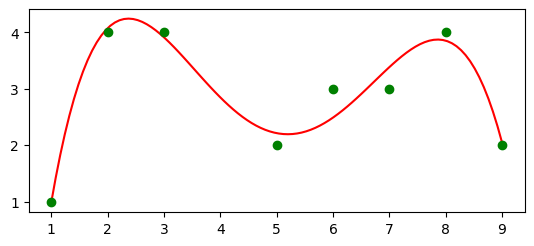

In [9]:
K = 6
if K < 5: 
    x_approx = np.linspace(min(x_values), max(x_values), 100)
    u = Approximation(x_values, y_values, p_values, K, x_approx) 
    plt.axes().set_aspect(1)
    plt.plot(x_values, y_values, 'go')
    plt.plot(x_approx, u, '-r')

else :
    x_approx = np.linspace(-1, 1, 100)
    a = min(x_values) ; b = max(x_values)
    x_0 = (a + b) / 2
    x_values = (x_values - x_0) / ((b - a) / 2)
    u = Approximation(x_values, y_values, p_values, K, x_approx, phi) 
    x_values = x_values * ((b - a) / 2) + x_0
    x_approx = x_approx * ((b - a) / 2) + x_0    
    plt.axes().set_aspect(1)
    # plt.xlim([0,10])
    # plt.ylim([0,10])
    plt.plot(x_approx, u, '-r')
    plt.plot(x_values, y_values, 'go')


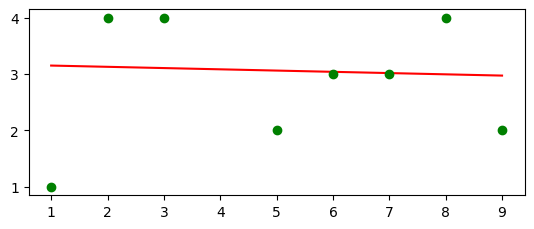

In [10]:
K = 1
x_approx = np.linspace(-1, 1, 100)
a = min(x_values) ; b = max(x_values)
x_0 = (a + b) / 2
x_values = (x_values - x_0) / ((b - a) / 2)
u = Approximation(x_values, y_values, p_values, K, x_approx, phi) 
x_values = x_values * ((b - a) / 2) + x_0
x_approx = x_approx * ((b - a) / 2) + x_0    
plt.axes().set_aspect(1)
plt.plot(x_approx, u, '-r')
plt.plot(x_values, y_values, 'go')




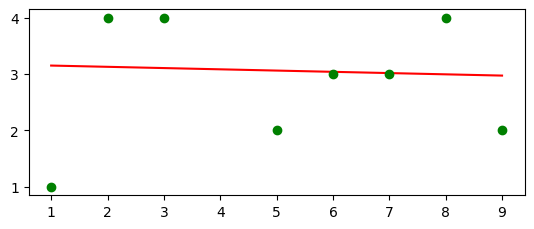

In [11]:
K = 1
p_values = p_values + rn.randint(5,10)
x_approx = np.linspace(-1, 1, 100)
a = min(x_values) ; b = max(x_values)
x_0 = (a + b) / 2
x_values = (x_values - x_0) / ((b - a) / 2)
u = Approximation(x_values, y_values, p_values, K, x_approx, phi) 
x_values = x_values * ((b - a) / 2) + x_0
x_approx = x_approx * ((b - a) / 2) + x_0    
plt.axes().set_aspect(1)
plt.plot(x_approx, u, '-r')
plt.plot(x_values, y_values, 'go')

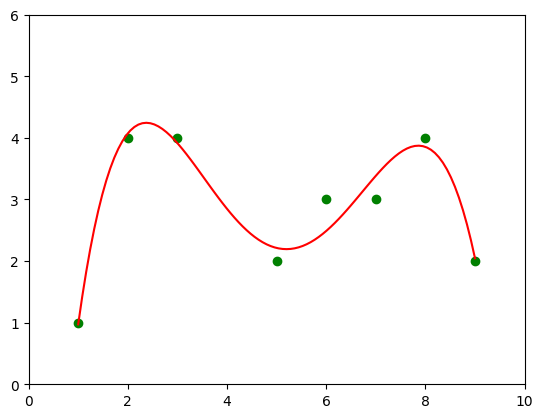

In [12]:
from numpy import zeros, array, linspace, dot, linalg
from matplotlib.pyplot import plot, axes, xlim, ylim
def Integration(x,u) :
    N = len(x) - 1
    result = 0.
    for n in range(1,N+1) :
        result += (u[n] + u[n-1])/2*(x[n] - x[n-1])
    return result

def phi(x,k) :
    return x**k

def Approximation(x,u,phi,K,a) :
    N = len(x)-1; A = zeros((K + 1,K + 1)); B = zeros((K + 1,1))
    for m in range(K+1) :
        for k in range(K+1) :
            A[m,k] = Integration(x, phi(x, m) * phi(x, k))
        B[m,0] = Integration(x, phi(x, m) * u)
    C = linalg.solve(A,B)
    result = 0.
    for k in range(K + 1) :
        result = result + C[k, 0] * phi(a, k)
    return(result)

x = array([1, 2, 3, 5, 6, 7, 8, 9])
u = array([1, 4, 4, 2, 3, 3, 4, 2])

plot(x,u,'go')

a = min(x); b = max(x)
x_0 = (a + b)/2; x = (x - x_0)/((b - a)/2)

K = 6

x_approx = linspace(-1,1,100)
u_approx = Approximation(x,u,phi,K,x_approx)

x_approx = x_approx*((b - a)/2) + (a + b)/2
plot(x_approx,u_approx,'-r')
xlim([0,10]); ylim([0,6]); 